In [138]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal

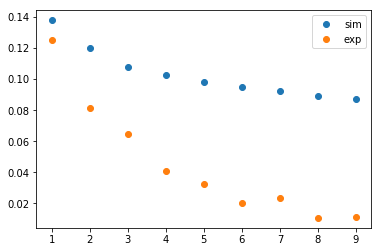

In [6]:
sim = np.array([0.13792135, 0.12028111, 0.10784815 ,0.10242254 ,0.09802149, 0.09494422,
 0.09208105, 0.08920631, 0.08717702])
exp =np.array([0.1249,    0.0815,    0.0648 ,   0.0409 ,   0.0324,    0.0199,    0.0235,    0.0106,0.0112])
N = len(sim)
x = np.arange(1,N+1)
plt.plot(x,sim,ls='',marker = 'o',label ='sim')
plt.plot(x,exp,ls = '',marker = 'o',label = 'exp')
plt.legend()

In [50]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_30_23/SigmaField_cooling_PS.csv', delimiter = ',')
#data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_30_23/SigmaField_NoRamancooling_PS.csv', delimiter = ',')



In [35]:
def power_law(x, a, b):
    return a * x**b

In [144]:
0.12*0.65

0.078

0.036749675


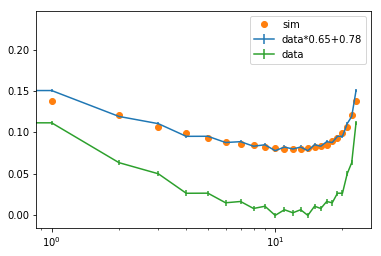

In [146]:
#plt.errorbar(data[:,0],data[:,1],data[:,2])
print(np.average(data[:,1]))
plt.errorbar(data[:,0],(data[:,1]+0.12)*0.65,data[:,2]*0.65,label = 'data*0.65+0.78')
plt.plot(data[:,0],simdata[:],marker = 'o',ls = '',label = 'sim')
plt.errorbar(data[:,0],(data[:,1]),data[:,2],label = 'data')

#plt.plot(data[:,0],expdata2*0.63+0.075,marker = 'o',ls = '',label = 'Ryan')
#plt.errorbar(data[:,0],data[:,1],data[:,2],ls = '',label = 'Fang',marker = 'o')

#plt.plot(data[1:10,0],power_law(data[1:10,0],0.21,-0.3))
plt.legend()
plt.xscale('log')
#plt.yscale('log')

In [38]:
simdata=np.array([0.23513887,0.13725895,0.12036162,0.10676615,0.09915829,0.09256072,0.08863921,0.08592485,0.08398068,0.08241807,0.0810125,0.0797318,0.07954196,0.07972313,0.08086032,0.08160596,0.08327514,0.08496372,0.08886353,0.09280065,0.09930302,0.10668414,0.12048065,0.1373209,])

In [39]:
simdata - data[:,1]

array([0.01530887, 0.01759895, 0.04496162, 0.04421715, 0.05828329,
       0.05583872, 0.06424821, 0.05996885, 0.07100468, 0.06726707,
       0.0713603 , 0.0637498 , 0.07390966, 0.06374113, 0.07120812,
       0.06645496, 0.07029914, 0.05900772, 0.06447253, 0.05607865,
       0.05842802, 0.04413514, 0.04508065, 0.0176609 ])

In [115]:
expdata2 = np.array([0.2230,0.1116,0.0711,0.0480,0.0299,0.0234,0.0162,0.0145,0.0127,0.0104,0.0078,0.0076,0.0081,0.0076,0.0078,0.0104,0.0127,0.0145,0.0162,0.0234,0.0299,0.0480,0.0711,0.1116])